# Домашнее задание №5 по МОМО

## 1) Импорт библиотек

In [1]:
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import pandas as pd # Библиотека Pandas для работы с табличными данными

import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека Seaborn для визуализации данных из Pandas

from sklearn.datasets import fetch_openml # функция библиотеки scikit-learn для загрузки данных с сайта OpenML

from sklearn.decomposition import PCA # Метод главных компонент от мира scikit-learn


In [2]:
plt.style.use('dark_background') # для установики темного фона графиков

## 2) Набор данных

В качестве данных мы рассмотрим набор данных Fashion-MNIST

Данный набор данных содержит изображения предметов одежды.

Размер изображений 28 на 28, что можно рассматривать как большую таблицу признаков из 784 столбцов

Единственный канал - "оттенки серого"

Изображения хранятся в 8-битном формате, т.е. оттенков серого 256 от 0 (черный) до 255 (белый)

In [3]:
# воспользуемся функцией fetch_openml для загрузки данных с сайта OpenML
X, y  = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame = True)
# нормализуем данные - из диапазона от 0 до 255 в диапазон от 0 до 1
X = X / 255.

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Посмотрим на нашу табличку данных

In [4]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.121569,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.105882,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.000003,0.000025,0.000135,0.000388,0.000972,0.001603,0.003149,0.008645,0.022098,0.056510,...,0.135617,0.091328,0.065144,0.069896,0.089757,0.070463,0.033428,0.010790,0.003281,0.000286
std,0.000343,0.001163,0.004709,0.009643,0.017287,0.022911,0.032104,0.055362,0.092937,0.149758,...,0.225822,0.191903,0.165000,0.172163,0.203346,0.177379,0.115796,0.068179,0.036308,0.008353
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.223529,0.031373,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.062745,0.176471,0.854902,0.725490,0.890196,0.901961,0.878431,0.882353,0.996078,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667


Разные примеры. Поменяв n, можно менять выборку данных для обзора.

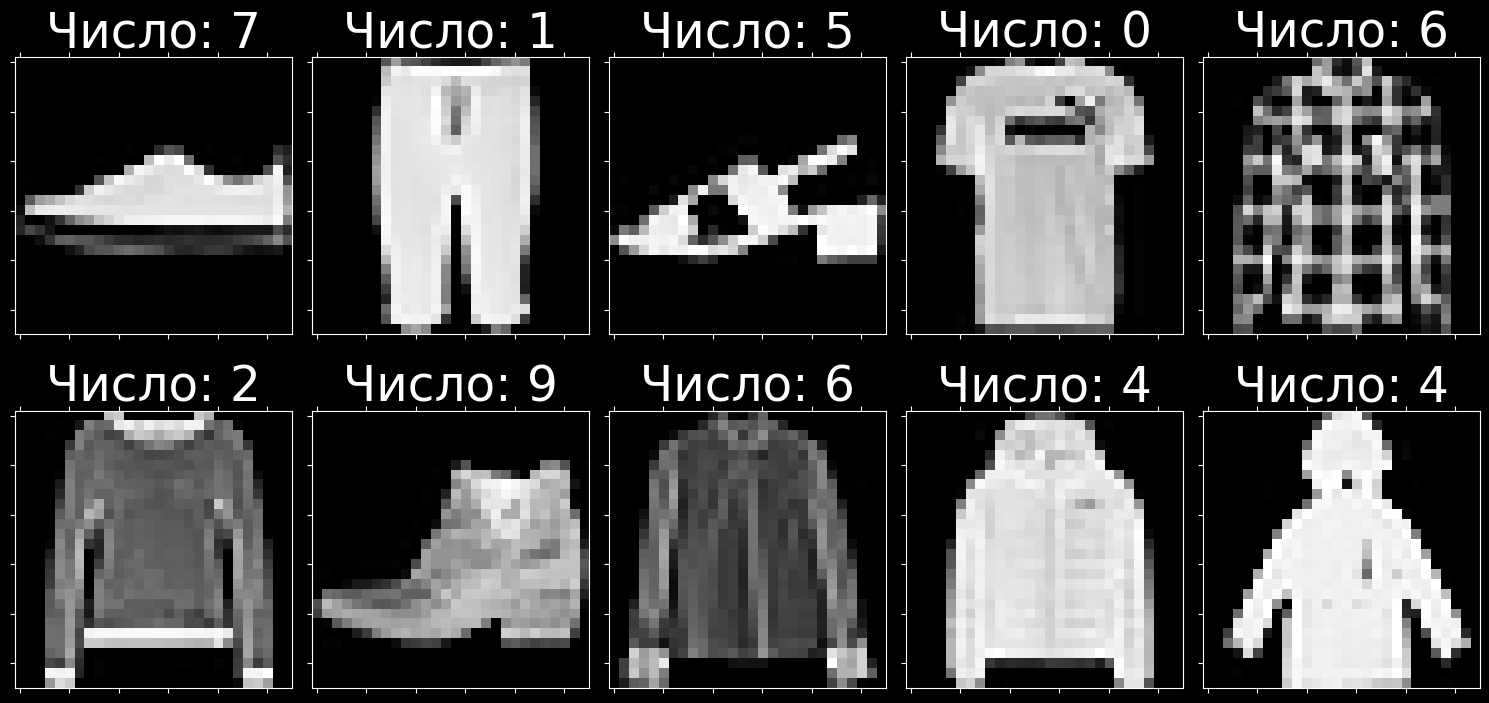

In [6]:
#@title Разные примеры { run: "auto" }
n =  20000 #@param {type:"slider", min:1, max:34672, step:1}

# создаем полотно
fig = plt.figure( figsize=(15,8) )
# на котором визуализируем 10 примеров изображений
# начиная с индекса n
for i in range(0,10):
    # каждое изображение будет на своем сабплоте
    ax = fig.add_subplot(2,5,i+1)
    # пишем какое число должно быть
    ax.set_title("Число: {}".format(str(y[i+n]) ), size=35)
    # отрисовываем с помощью функции matshow
    # для этого нам вектор-строку из 784 элементов
    # нужно преобразовать в матрицу 28 на 28
    ax.matshow(1-X.loc[i+n,'pixel1':'pixel784'].values.reshape((28,28)).astype(float),
                cmap='Greys')
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.tight_layout()


Посмотрим на наши данные, но не как на цифры, а как на табличные данные.

In [7]:
X_plot = X.loc[0:1000,'pixel390':'pixel395'].copy() # данные из середины

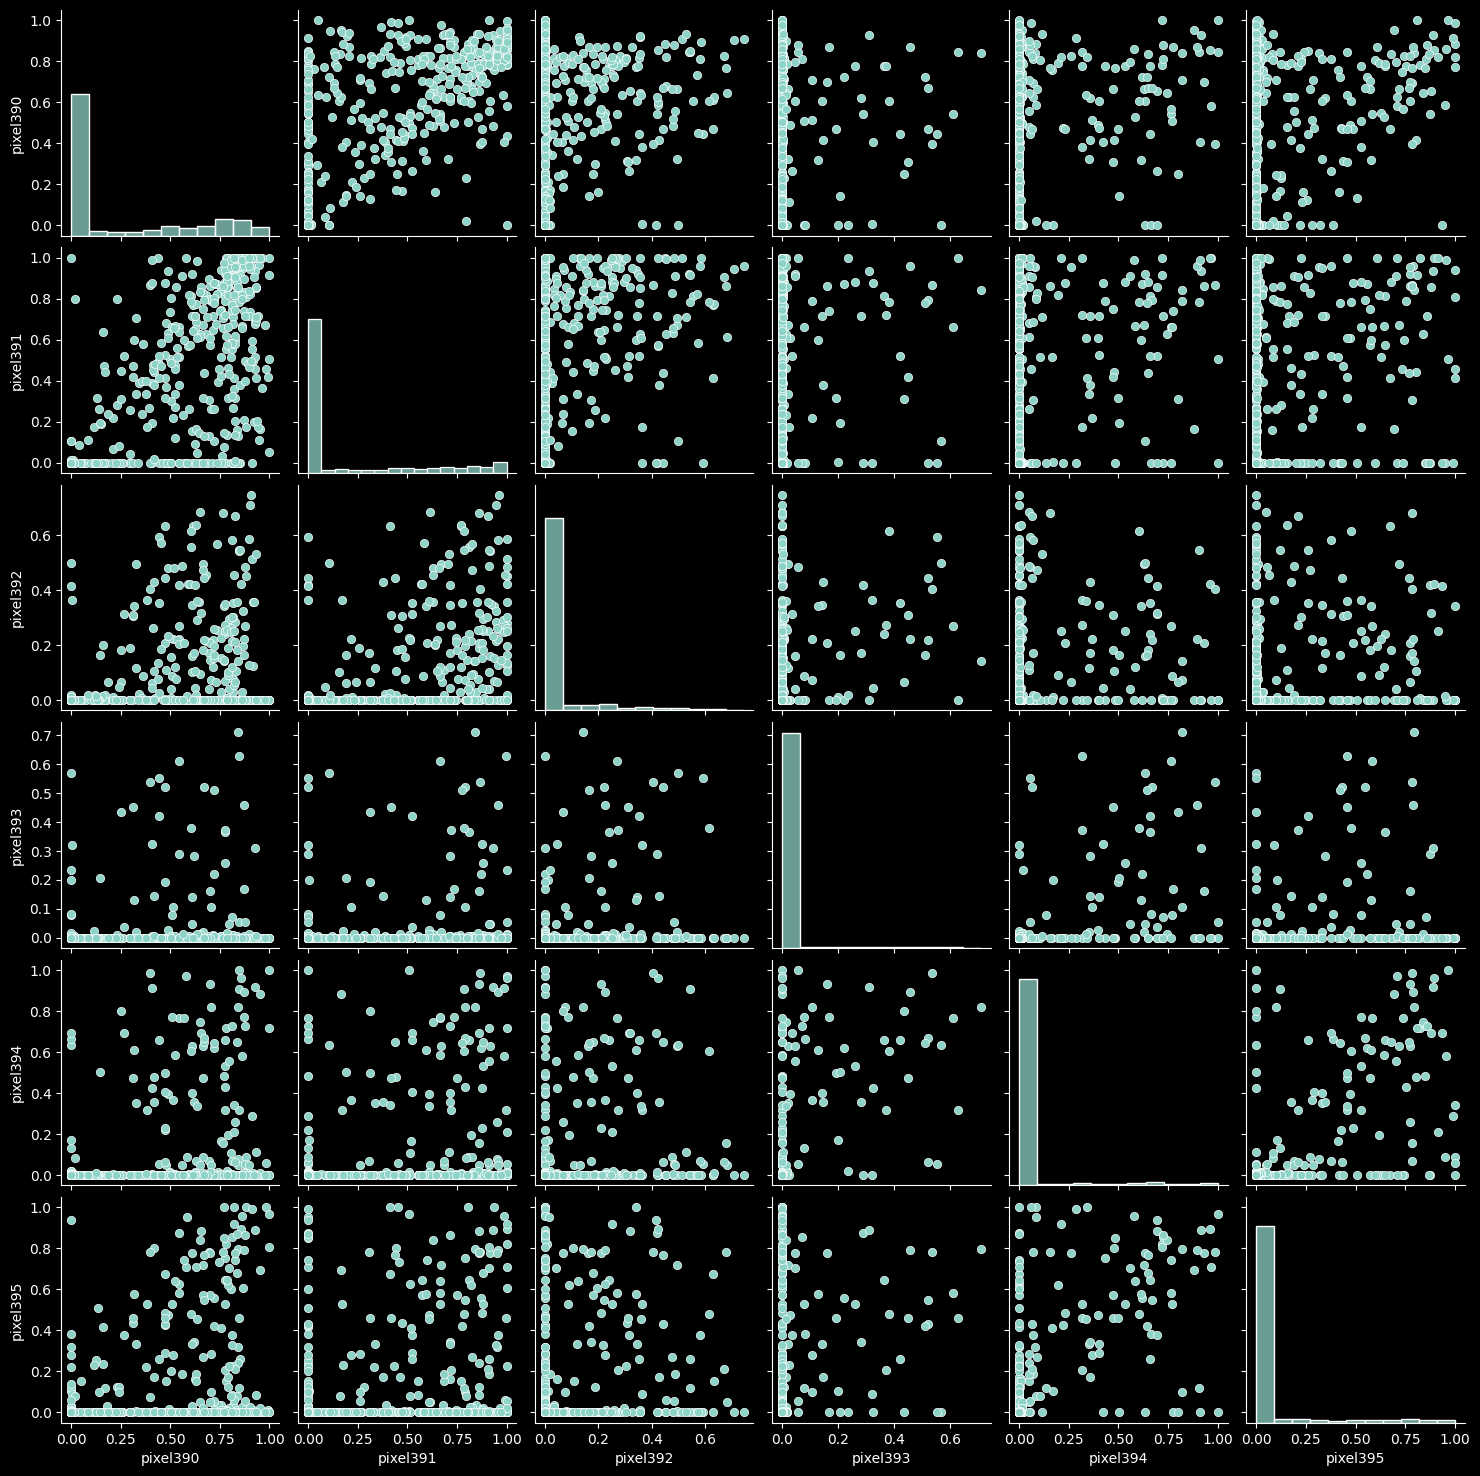

In [8]:
sns.pairplot(X_plot);

In [9]:
# данные из первых колонок
X_plot = X.loc[0:1000,'pixel1':'pixel5'].copy()

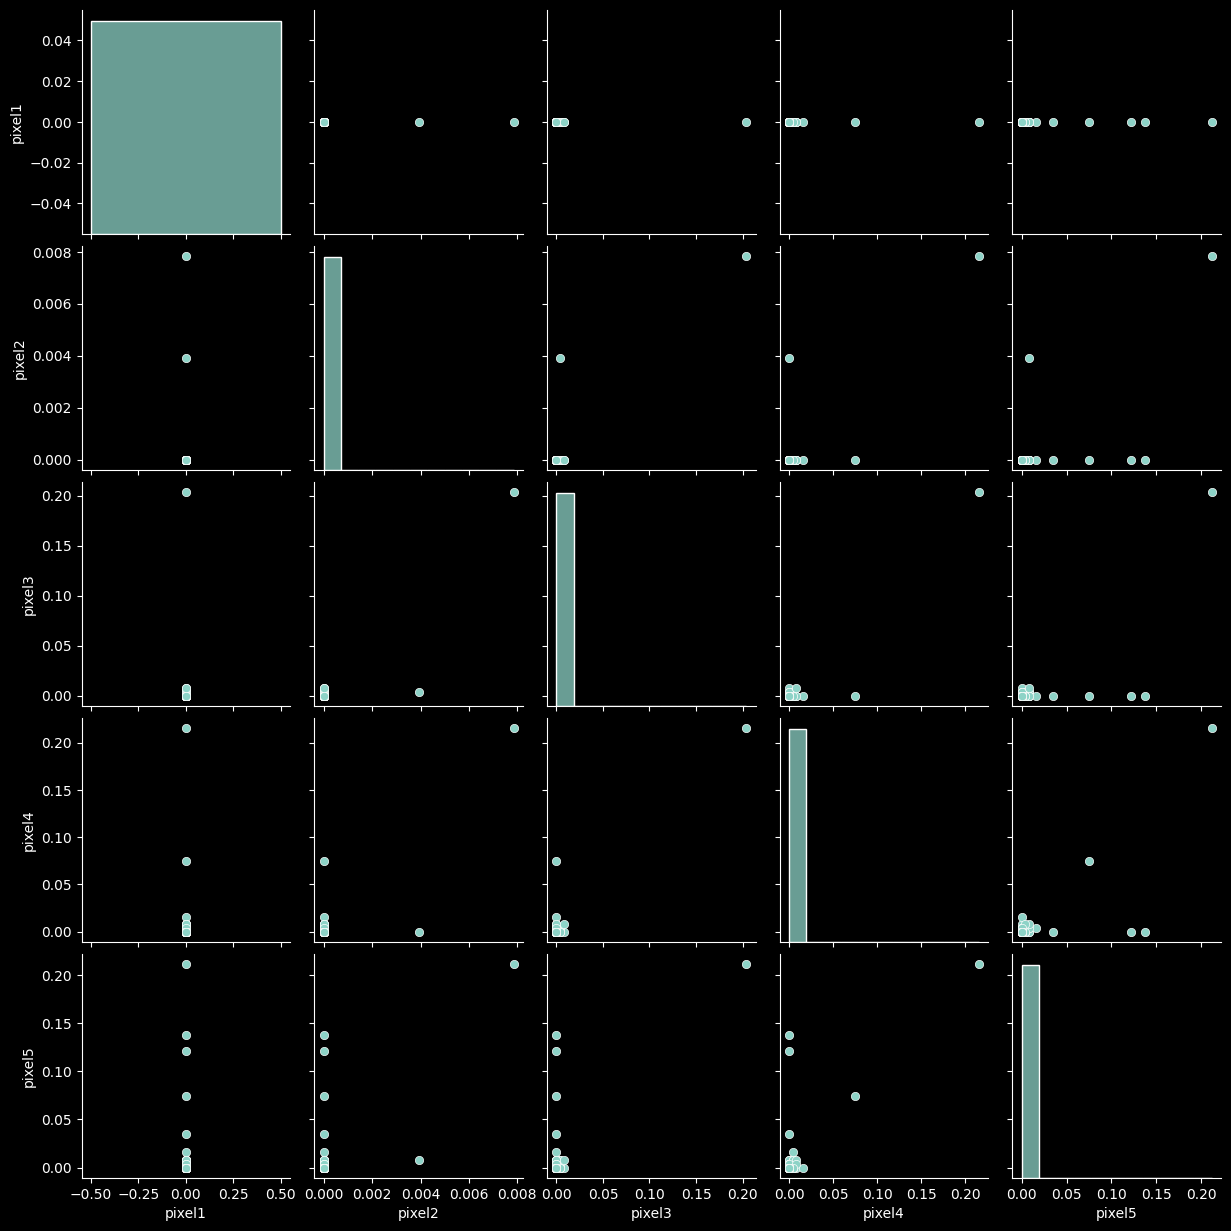

In [10]:
sns.pairplot(X_plot)

#### <u>ВЫВОДЫ:</u>
1) Первые признаки ('pixel1' - 'pixel5') мало информативны, т.к. практически нет дисперсии и признаки почти всегда принимают 0. Что не удивительно, т.к. на картинках видно, что первые пиксели (в углу) всегда черные, там не попадает рисунок одежды
2) И наоборот, признаки в центре ('pixel390' - 'pixel395') имеют большую дисперсию и будут более "главными" в методе PCA при определении класса одежды.

## 3) Метод Главных Компонент

In [11]:
pca = PCA(n_components = 784)
pca.fit(X)

PCA(n_components=784)

In [12]:
# трансформируем данные
pca_result_mnist = pca.transform(X)

### 3.1) Оценка качество восстановления при разных значениях размерности собственного пространства:

Попробуем восстановить картинку, используя только 4 главных компонента

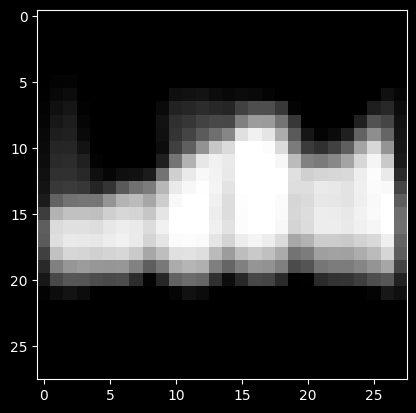

In [13]:
#@title Создаем изображение цифр используя только 4 числа{ run: "auto" }
#@markdown ### 1 главная компонента
pca1 =  -9 #@param {type:"slider", min:-10, max:10, step:0.1}
#@markdown ### 2 главная компонента
pca2 =  3 #@param {type:"slider", min:-10, max:10, step:0.1}
#@markdown ### 3 главная компонента
pca3 =  -1 #@param {type:"slider", min:-10, max:10, step:0.1}
#@markdown ### 4 главная компонента
pca4 =  -9 #@param {type:"slider", min:-10, max:10, step:0.1}

test_input = np.array([pca1,pca2,pca3,pca4])


pca_inverse = np.dot(test_input, pca.components_[:4]) + pca.mean_

plt.imshow(1-pca_inverse.reshape((28,28)).astype(float),
           cmap='Greys',
           vmin = 0, vmax = 1);

А теперь автоматически восстановим несколько картинок с разным количеством главных компонент (10, 50 и 90)

In [14]:
def restoration(n=20000, n_comp=50):

    pca_inverse = np.dot(pca_result_mnist[:,:n_comp], pca.components_[:n_comp]) + pca.mean_

    fig=plt.figure(figsize=(20,7))
    for i in range(0,5):
      ax = fig.add_subplot(2,5,i+6)
      ax.set_title("Реконструкция", size=15)
      ax.matshow(1-pca_inverse[i+n,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
      plt.setp(ax.get_xticklabels(), visible=False)
      plt.setp(ax.get_yticklabels(), visible=False)

    for i in range(0,5):
      ax = fig.add_subplot(2,5,i+1)
      ax.set_title("Оригинал", size=15)
      ax.matshow(1-X.loc[i+n,'pixel1':'pixel784'].values.reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
      plt.setp(ax.get_xticklabels(), visible=False)
      plt.setp(ax.get_yticklabels(), visible=False)

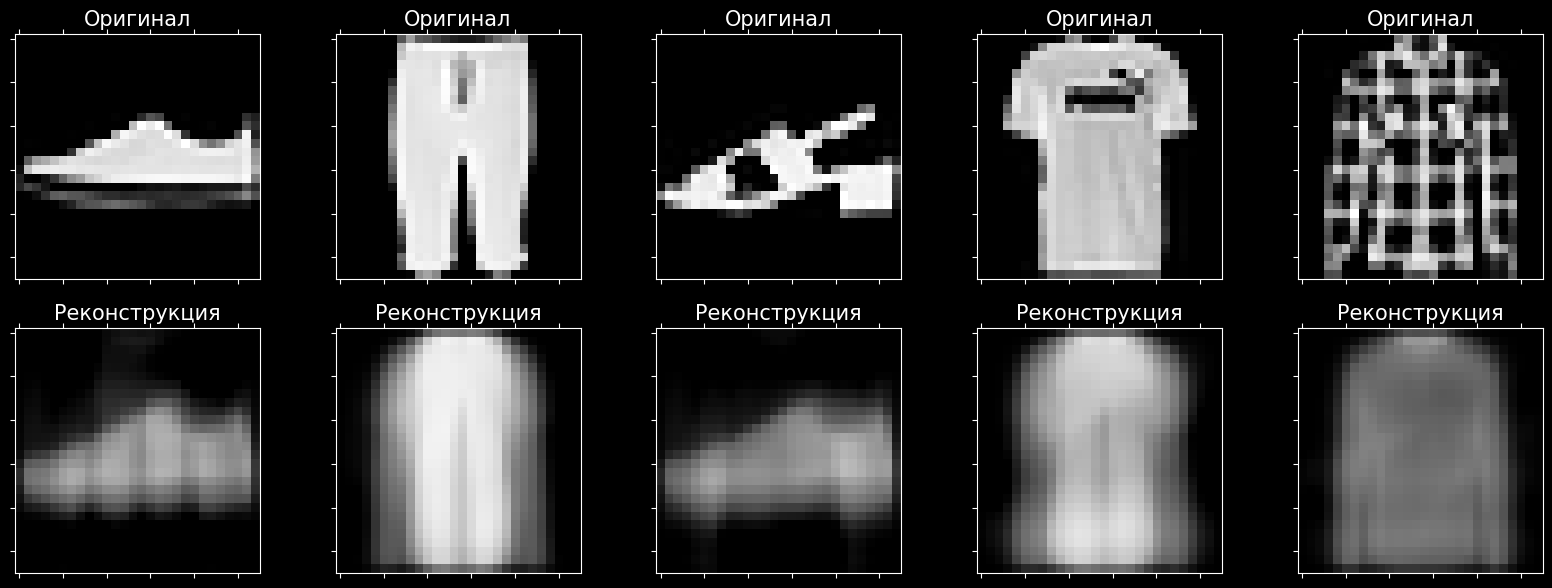

In [15]:
restoration(n_comp=4)

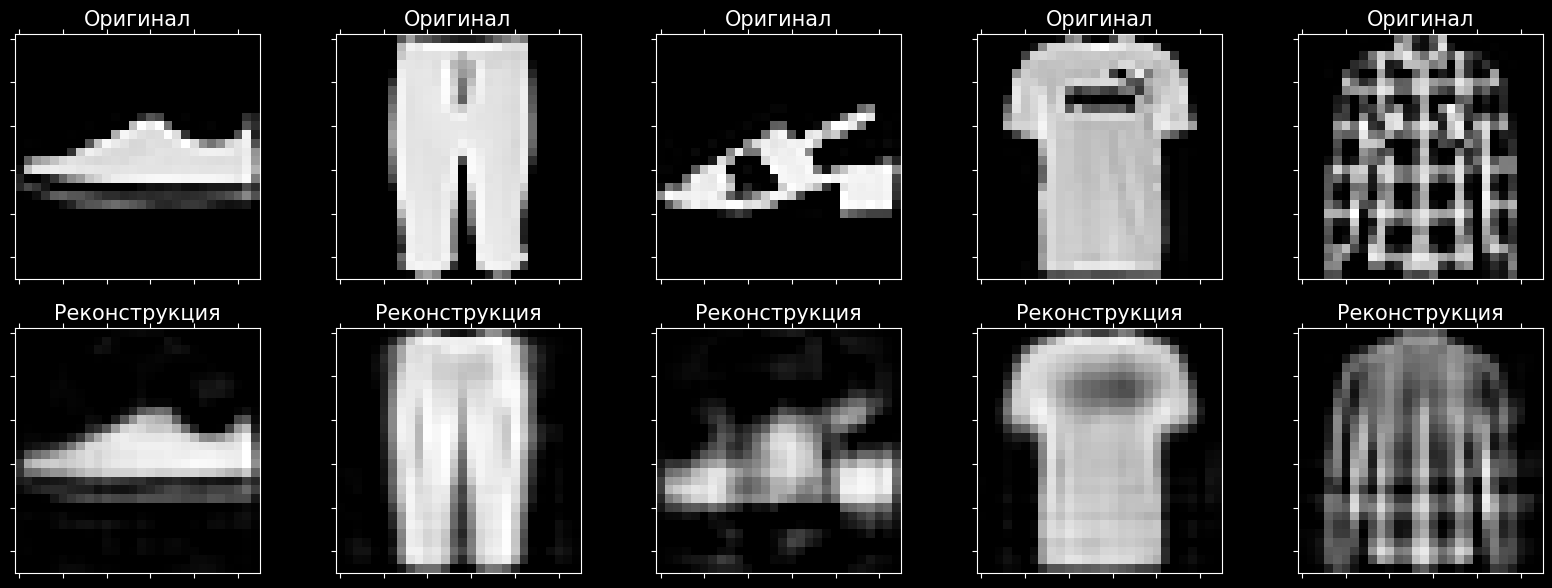

In [16]:
restoration(n_comp=50)

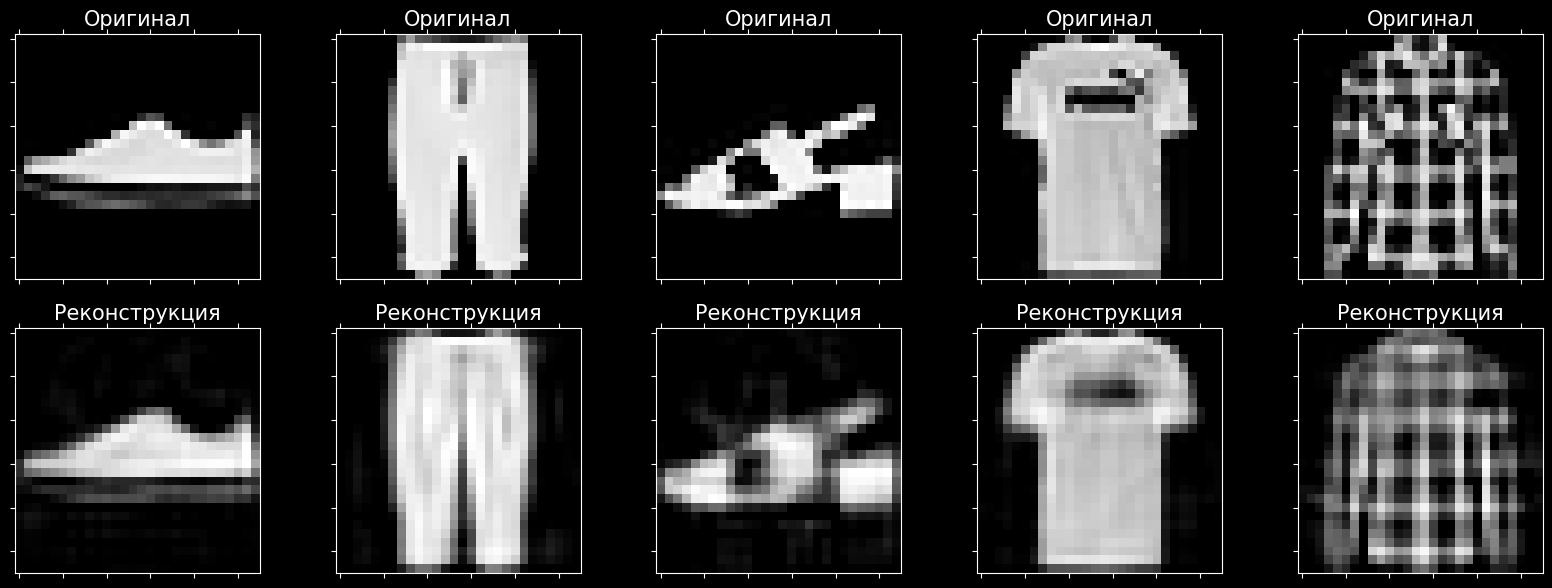

In [17]:
restoration(n_comp=90)

#### <u>ВЫВОДЫ:</u>
1) При малых количествах главных компонентов данные воспроизводятся плохо. Единственное что можно сказать, это классифицировать обувь, штаны или одежда. Более подробные детали не восстанавливаются;
2) При среднем количестве компонент, начинает проявляться структура одежды - клетка на рубашках, подошва на обуви...
3) При большом количестве компонент, картинки практически полностью восстановились. В нашем примере получается, что 90 признаков достаточно хорошо восстанавливают картинки, а изначально их было 784.

### 3.2) Визуализация разных пространств главных компонент:

In [18]:
# Функция для визуализации пространства главных компонент
def plot_multi(data, y,  names):
    """Нескольких двумерных проекций многомерных данных (pairplot на минималках)
    Входные переменные:
    ===========
    data: данные
    y: целевые метки
    names: подписи к осям
    """
    # собираем оси данных, которые мы визуализируем
    axis = [[0,1],
            [2,1],
            [0,3],
            [2,3],]

    # собираем подписи к осям в нужном порядке
    labels = [['',names[1]],
            ['',''],
            [names[0],names[3]],
            [names[2],'']]

    # создаем полотно 2 на 2
    fig, sub = plt.subplots(2, 2, figsize = (11,11))

    # в каждом графике этого полотна мы визуализируем соответсвующие проекции
    for n, (axi, label, ax) in enumerate(zip(axis,  labels, sub.flatten())):
        # визуализация - стандартная скатерограмма
        scatter = ax.scatter(data[:,axi[0]],data[:,axi[1]],
                             c=y,  # разные метки будут подсвечены разным цветом
                             s = 36, cmap = 'tab10',
                             alpha = 0.7, facecolors = 'none' );
        ax.set_ylabel(label[1], fontsize = 20)
        ax.set_xlabel(label[0], fontsize = 20)
        ax.tick_params(axis='x', labelsize= 15)
        ax.tick_params(axis='y', labelsize= 15)
        ax.grid()
        ax.set_xlim([-9,10])
        ax.set_ylim([-7,7])
        legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper left", title="Цифры",
                        fontsize = 10) # собираем легенду
        ax.add_artist(legend1)

Пространство Главных Компонент

In [19]:
pca_names = [str(x+1)+'-я главная компонента' for x in range(4)]

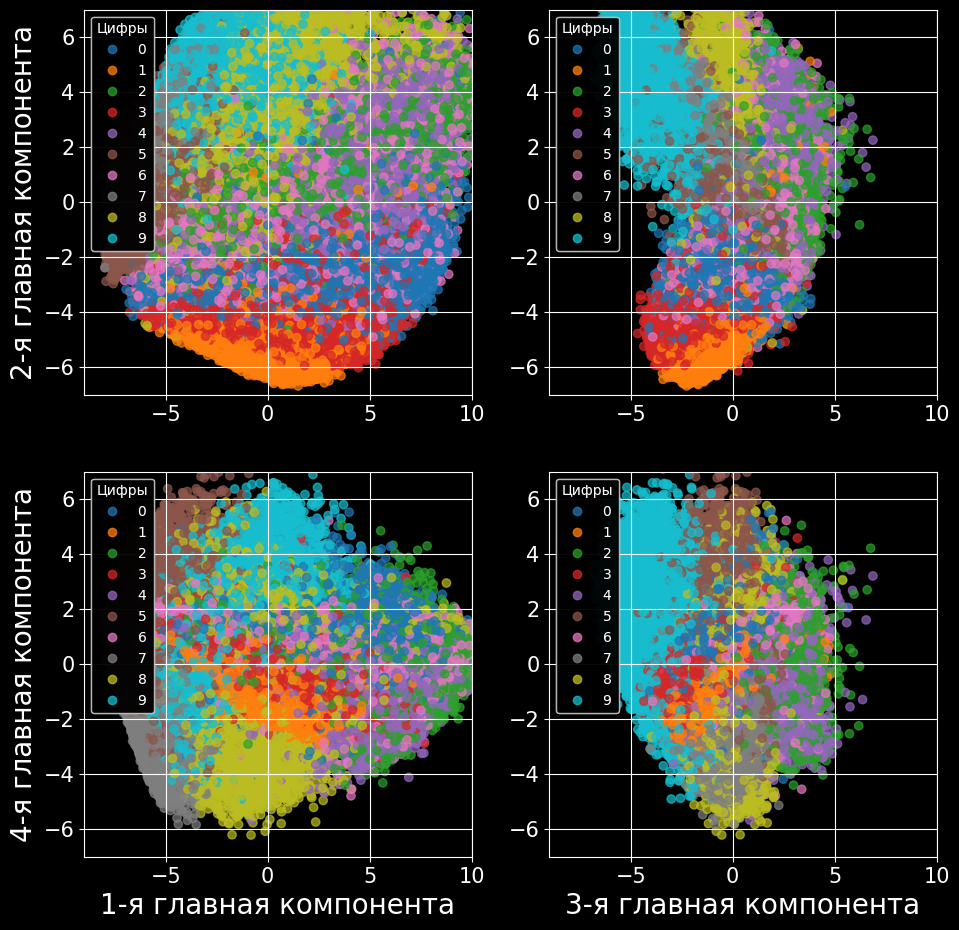

In [20]:
plot_multi(pca_result_mnist, y.astype(int), pca_names)

### 3.3) Визуализация разных собственных векторов:

Для визуализации собственных векторов сделаем преобразование от вектор-строки из 784 элементов в матрицу 28 на 28.

Поскольку отдельный собственный вектор это веса всех исходных  признаков в отдельных главных компонентах. Т.е. это вектор соразмерный с исходными данными, а значит его тоже можно представить в виде изображения

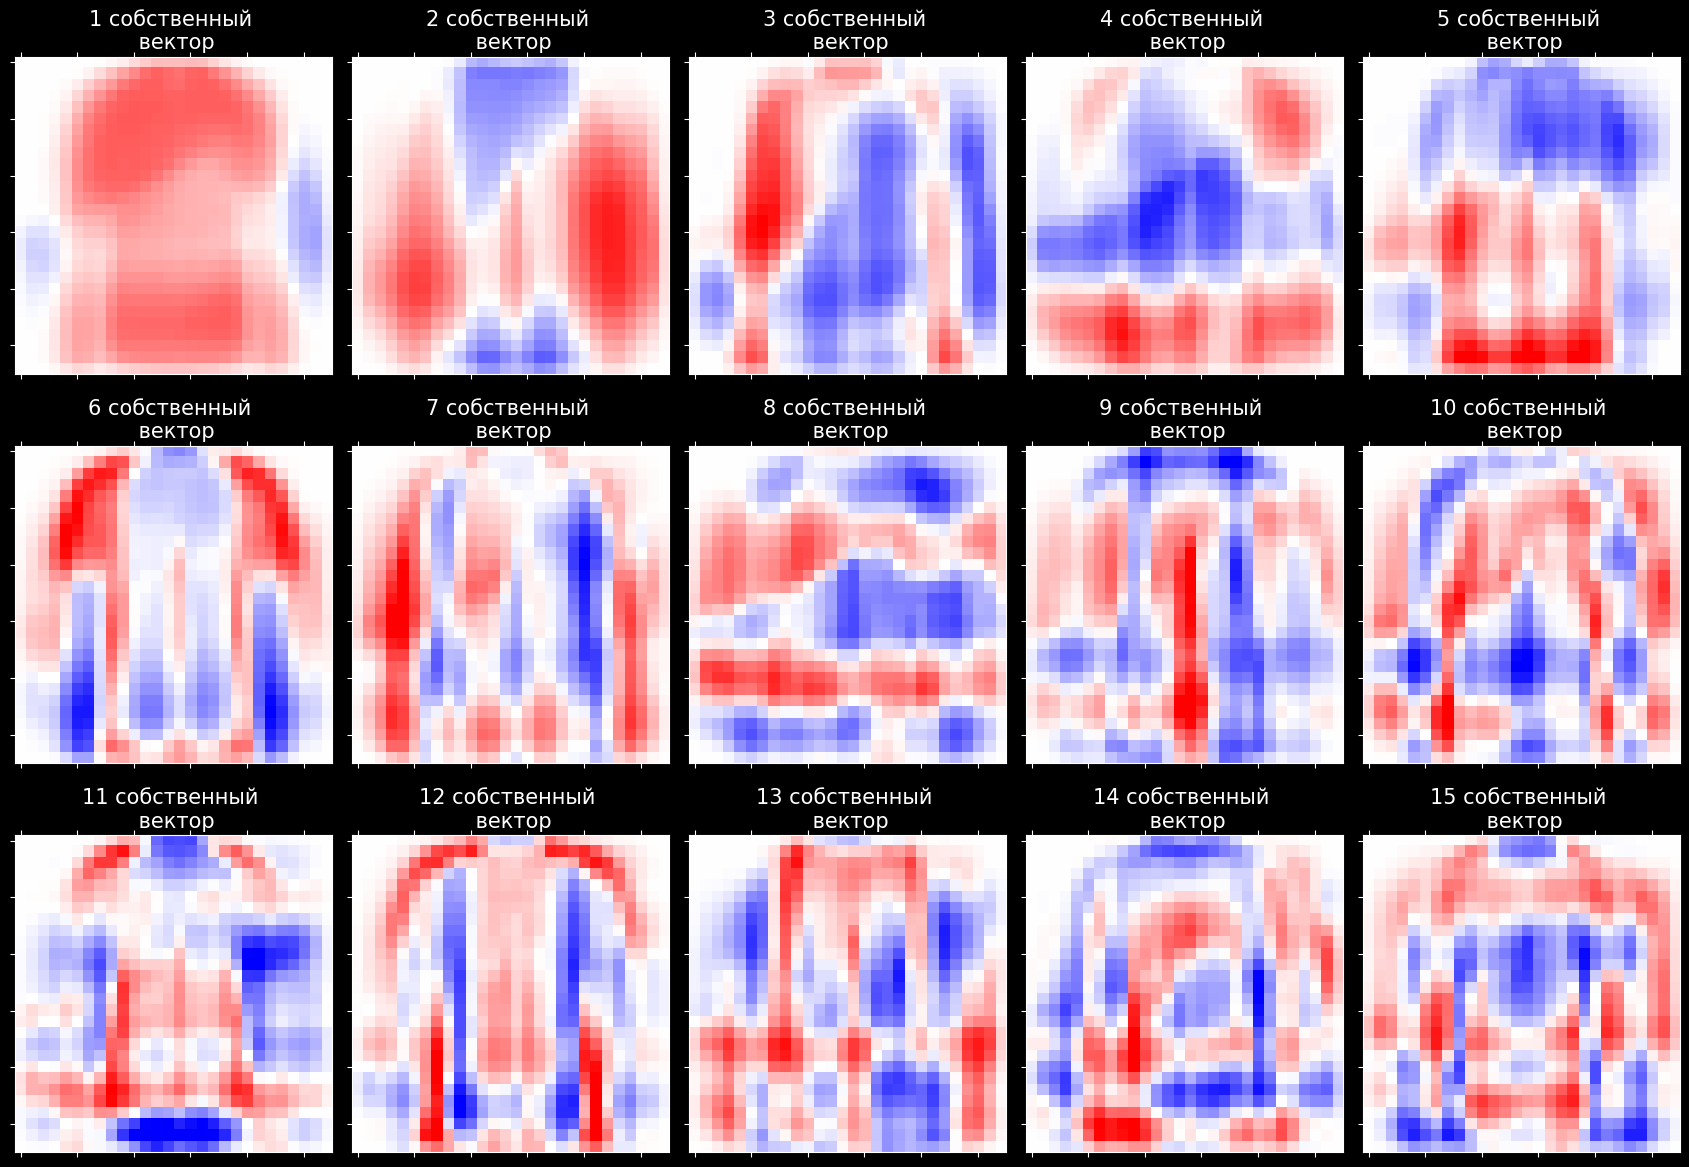

In [21]:
W_pca=pca.components_
fig=plt.figure(figsize=(17,12))
for i in range(0,15):
  ax = fig.add_subplot(3,5,i+1,title=str(i+1) )
  ax.set_title("{} собственный \n вектор".format(str(i+1)), size=15)
  ax.matshow(W_pca[i].reshape((28,28)).astype(float), cmap = 'bwr', vmin=-0.1,vmax = 0.1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)
plt.tight_layout();

## 4) Выводы о полученном решении.

1. Рассмотрев первые 15 главных компонент, можно сказать что метод постарался разбить на группы, но сделал это не очень хорошо. Можно найти лишь несколько очертаний определющие более-менее предметы одежды (см. пункт 2). В целом главные компоненты на датасете Fashion-MNIST плохо интерпретируемы для человека.

2. Можно выделить лишь несколько компонент на мой взгляд:
 - 1-ая компонента похоже что определяет является ли одежда кофточкой;
 - 4-ая компонента просматривается решение "не-кроссовки/не-обувь";
 - 2-ая и 3-ья возможно в двоем определяют что это "не-штаны" и снова склоняются к кофтам )

3. В целом метод справляется со своей задачей, может классифицировать данный простенький датасет и для хорошего качества достаточно будет 90-100 компонентов.